# Assignment 01

- Name: Ran Arino
- Student ID: 153073200
- Email: rarino@myseneca.ca
- Course: Health Analytics
- Course ID: BDA700NAA.05841.2247
- Data source: 
    - Dataset URL: https://data.ontario.ca/dataset/covid-19-assessment-centre-locations/resource/1b073d1d-f832-4015-8bc0-d3381e84a465
    - Description: https://ouvert.canada.ca/data/dataset/8ba078b2-ca9b-44c1-b5db-9674d85421f9

## Data Prepation

In [68]:
import datetime

from geopy.distance import geodesic
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# make sure to install the following packages
# pip install geopy pandas matplotlib numpy plotly

In [41]:
# load data
data = pd.read_json('https://www.ontario.ca/covid-19-ac-assets/data/locations.json')
population_df = pd.read_csv('ontario_phu_population.csv')
# columns
print("Columns: \n", data.columns)
# first 5 observations
data.head()

Columns: 
 Index(['location_id', 'assessment_centre', 'location_name', 'operated_by',
       'city', 'address', 'postal_code', 'province', 'latitude', 'longitude',
       'phu', 'website', 'monday', 'wednesday', 'friday', 'saturday', 'sunday',
       'appointments', 'online_appointments', 'walk_ins', 'symptomatic',
       'drive_through', 'children_under_2', 'age_threshold', 'accessible',
       'public_transit', 'additional_information', 'additional_information_fr',
       'location_name_fr', 'address_fr', 'tuesday', 'thursday', 'phone',
       'french_language_services', 'asl_interpretation', 'weeks_pregnant',
       'free_parking', 'phone_appointments', 'general_population',
       'first_nations', 'email', 'testing_enrolled', 'community_lab',
       'pharmacy', 'vaccine_enrolled'],
      dtype='object')


,location_id,assessment_centre,location_name,operated_by,city,address,postal_code,province,latitude,longitude,...,weeks_pregnant,free_parking,phone_appointments,general_population,first_nations,email,testing_enrolled,community_lab,pharmacy,vaccine_enrolled
0,2,1.0,South Georgian Bay Regional Assessment Centre,Georgian Bay Family Health Team,Collingwood,490 Ontario Street,L9Y 1N6,ON,44.503928,-80.201516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34,1.0,Lakeridge Health - Ajax Pickering,k,Ajax,580 Harwood Avenue South,L1S 2J4,ON,43.836799,-79.017114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,84,1.0,Santé Manitouwadge Health,Santé Manitouwadge Health,Manitouwadge,1 Health Care Crescent,P0T 2C0,ON,49.127701,-85.824681,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,89,1.0,Superior North EMS Community Paramedicine Program,Superior North EMS,Thunder Bay,1408 Brown Street,P7B 2M6,ON,48.365919,-89.281230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,112,1.0,Toronto Western Hospital,University Health Network,Toronto,347 Bathurst Street,M5T 2S7,ON,43.652594,-79.405856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Remove commas from 'phu' column in data DataFrame
data['phu'] = data['phu'].str.replace(',', '')

# Top 10 phus
top_10_phus = data['phu'].value_counts()[:10]
top_10_phus_df = pd.DataFrame({'phu': top_10_phus.index, 'Count': top_10_phus.values})

# Rename the 'Health Unit' column in the population DataFrame to match the 'phu' column in the data DataFrame
population_df.rename(columns={'Health Unit': 'phu'}, inplace=True)

# Merge the two DataFrames based on the 'phu' column
top_10_phus_df = pd.merge(top_10_phus_df, population_df, on='phu', how='left')

# Display the merged DataFrame
top_10_phus_df

,phu,Count,Population,Age 0-14 (%),Age 15-64 (%),Age 65+ (%)
0,Toronto Public Health,414,1281675,12.9,71.7,15.5
1,Peel Public Health,182,1451025,16.5,68.8,14.7
2,York Region Public Health Services,169,1173335,16.3,66.7,17.0
3,Ottawa Public Health,141,1017450,16.4,66.7,16.9
4,Durham Region Health Department,103,696990,18.0,66.1,15.9
5,Halton Region Health Department,91,596640,18.6,65.4,16.0
6,Region of Waterloo Public Health,82,587165,17.3,67.2,15.5
7,Simcoe Muskoka District Health Unit,82,599840,15.9,63.3,20.8
8,Windsor-Essex County Health Unit,68,422860,16.3,64.4,19.3
9,Hamilton Public Health Services,68,569355,16.0,65.7,18.3


In [3]:
# general info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   location_id                1981 non-null   int64  
 1   assessment_centre          345 non-null    float64
 2   location_name              1981 non-null   object 
 3   operated_by                396 non-null    object 
 4   city                       1981 non-null   object 
 5   address                    1977 non-null   object 
 6   postal_code                1979 non-null   object 
 7   province                   1981 non-null   object 
 8   latitude                   1979 non-null   float64
 9   longitude                  1979 non-null   float64
 10  phu                        1976 non-null   object 
 11  website                    1874 non-null   object 
 12  monday                     1861 non-null   object 
 13  wednesday                  1861 non-null   objec

In [4]:
data.describe()

,location_id,assessment_centre,latitude,longitude,appointments,walk_ins,symptomatic,drive_through,children_under_2,accessible,...,french_language_services,asl_interpretation,free_parking,phone_appointments,general_population,first_nations,testing_enrolled,community_lab,pharmacy,vaccine_enrolled
count,1981.000000,345.0,1979.000000,1979.000000,1936.0,86.0,866.0,55.0,170.0,169.0,...,64.0,17.0,146.0,1729.0,93.0,9.0,139.0,60.0,1574.0,648.0
mean,1724.548208,1.0,43.963690,-79.397793,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,3802.705065,0.0,1.807148,3.283538,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,1.0,0.000000,-94.499429,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,512.000000,1.0,43.501620,-79.898772,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1013.000000,1.0,43.733765,-79.484541,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1515.000000,1.0,44.176155,-79.220130,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,23470.000000,1.0,52.922613,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [31]:
# top 10 cities with most vaccination shot locations
data['phu'].value_counts()[:10]

phu
Toronto Public Health                  414
Peel Public Health                     182
York Region Public Health Services     169
Ottawa Public Health                   141
Durham Region Health Department        103
Halton Region Health Department         91
Simcoe Muskoka District Health Unit     82
Region of Waterloo, Public Health       82
Windsor-Essex County Health Unit        68
Hamilton Public Health Services         68
Name: count, dtype: int64

## Business questions

1. **Assessment Centre Distribution and Accessibility:**
    - How are testing centres distributed across different Cities and PHUs (Public Health Units)?
    - How differnt the capasity of each testing center at each PHU area?
    - How does the density of testing centres vary across different geographic regions?

2. **Operational Characteristics:**
    - What are the most common operating hours of assessment centres?
    - What percentage of assessment centres offer appointments, walk-ins, or both?
    - What is the prevalence of services like language interpretation or accommodations for specific populations (e.g., children under 2, French service)?


## 1. Geographic Distribution & Accessibility:

### a) Distribution of Assessment Centres across Cities and PHUs:

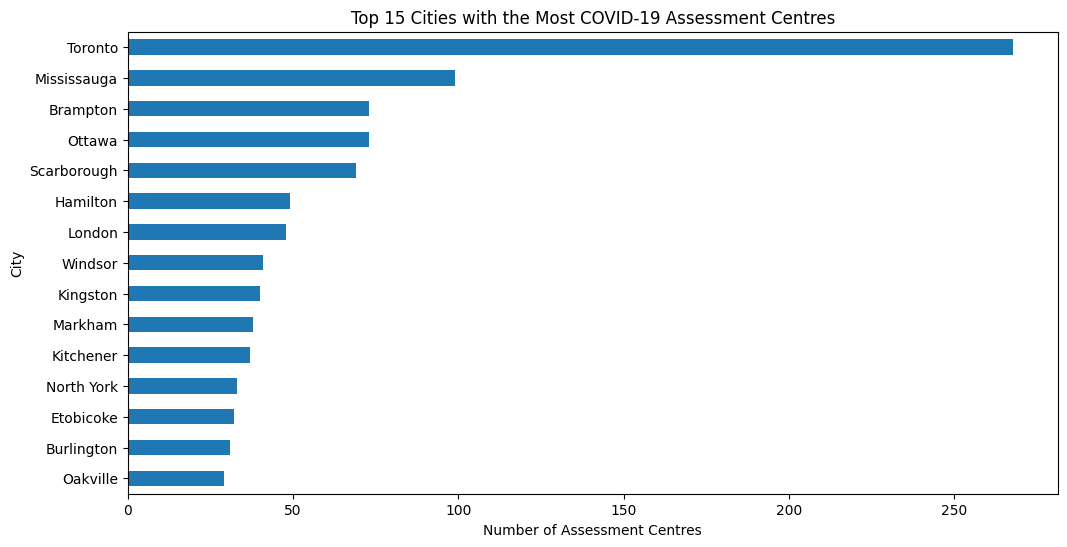

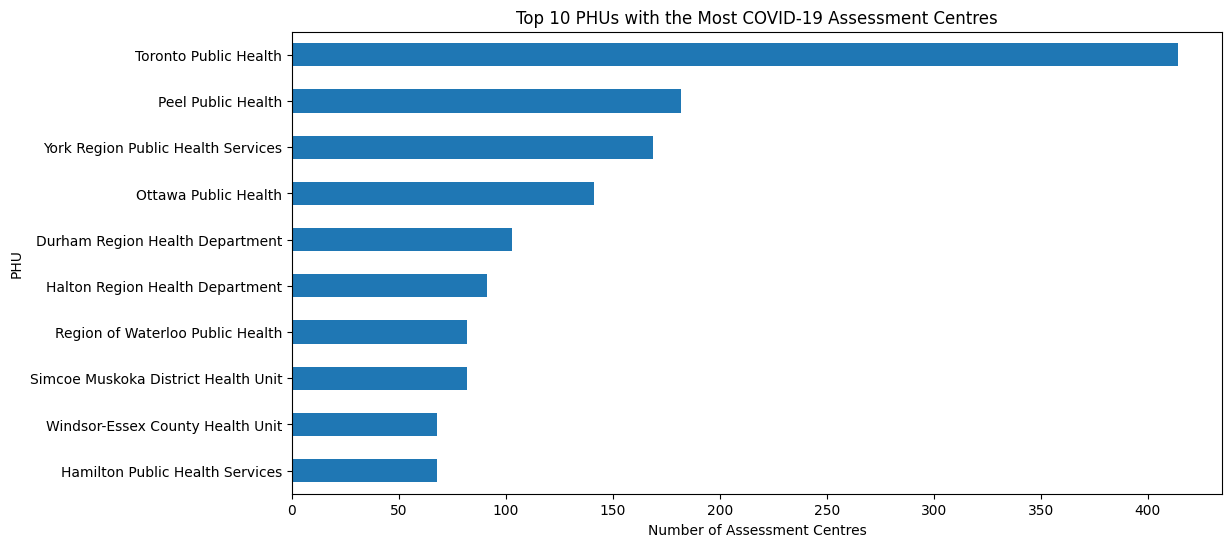

In [119]:
# Count the number of assessment centres in each city
city_counts = data['city'].value_counts()

# Plot the top 15 cities with the most assessment centres
plt.figure(figsize=(12, 6))
city_counts[:15][::-1].plot(kind='barh')
plt.title('Top 15 Cities with the Most COVID-19 Assessment Centres')
plt.ylabel('City')
plt.xlabel('Number of Assessment Centres')
plt.show()

# Count the number of assessment centres in each PHU
phu_counts = data['phu'].value_counts()

# Plot the PHUs with the most assessment centres
plt.figure(figsize=(12, 6))
phu_counts[:10][::-1].plot(kind='barh')
plt.title('Top 10 PHUs with the Most COVID-19 Assessment Centres')
plt.ylabel('PHU')
plt.xlabel('Number of Assessment Centres')
plt.show()



### b) Capacity of Assessment Centres across PHUs

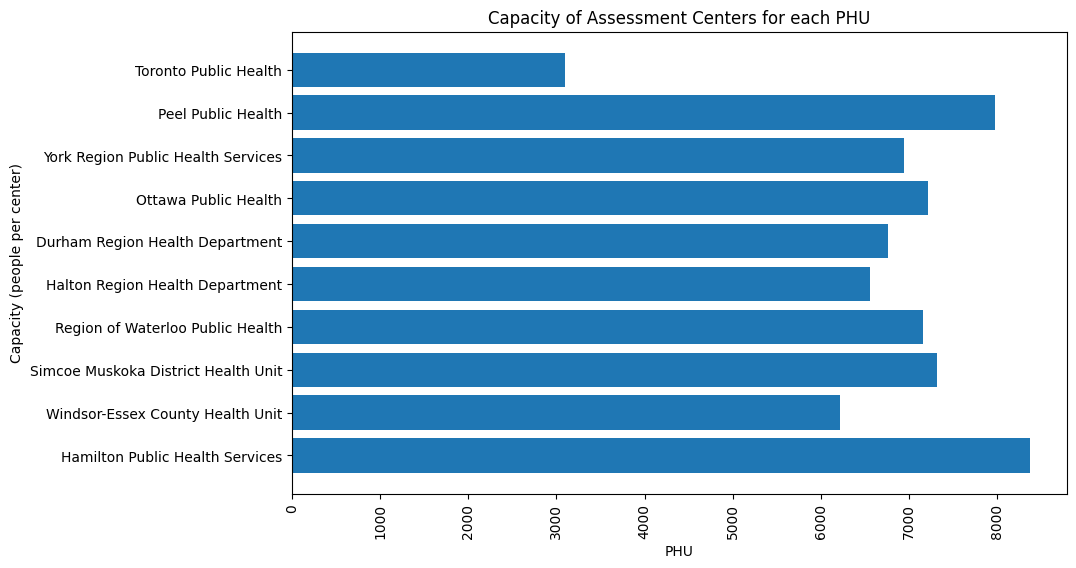

In [54]:
# Calculate the proportion of assessment centres in each PHU
top_10_phus_df['Proportion'] = (top_10_phus_df['Count'] / top_10_phus_df['Population']) * 100

# Calculate the capacity of vaccine centres for each health unit
top_10_phus_df['Capacity'] = top_10_phus_df['Population'] / top_10_phus_df['Count']

# Plot the capacity of vaccine centres for each health unit
plt.figure(figsize=(10, 6))
plt.barh(top_10_phus_df['phu'][::-1], top_10_phus_df['Capacity'][::-1])
plt.title('Capacity of Assessment Centres for each PHU')
plt.xlabel('PHU')
plt.ylabel('Capacity (people per center)')
plt.xticks(rotation=90)
plt.show()


### c) Geographic Distribution of Testing Centres and PHUs

In [153]:
fig1 = px.scatter_geo(data, lat='latitude', lon='longitude', 
                     scope='north america',
                     title='Geographic Distribution of COVID-19 Testing Centres in Ontario, Canada',
                     hover_name='location_name',  # Show location name on hover
                     color_discrete_sequence=['red'], 
                     center={'lat': 43.65107, 'lon': -79.347015},
                    )

fig1.update_geos(
    visible=True,
    resolution=50, 
    showcountries=True, countrycolor="gray",
    showsubunits=True, subunitcolor="Blue"
)
fig1.update_layout(
    margin={"r":0,"t":30,"l":0,"b":0}, # Reduce margins for a closer view
    geo=dict(
        projection_scale=8 # Increase zoom level (adjust as needed)
    )
)

fig1.update_traces(marker=dict(size=5, opacity=0.25)) # Adjust size and opacity as needed

fig1.show()

In [196]:
# Extract the PHU names from top_10_phus_df
phu_names = top_10_phus_df['phu'].tolist()

# Filter 'data' to include only the top 10 PHUs
data_top_10 = data[data['phu'].isin(phu_names)]

# Group by PHU and count the number of testing centres
counts = data_top_10.groupby('phu').size()

# Calculate the center of each PHU's geolocation
# Assuming 'latitude' and 'longitude' are columns in your dataframe
centres = [(row['longitude'], row['latitude']) for _, row in data_top_10.groupby('phu').first().iterrows()]

# Merge with top_10_phus_df to get capacity
data_top_10 = pd.merge(data_top_10, top_10_phus_df[['phu', 'Capacity']], on='phu', how='left')

# Create the Plotly figure
fig = go.Figure()

# Add the testing centres as a single trace with transparent gray color
fig.add_trace(go.Scattergeo(
    lon=data_top_10['longitude'],
    lat=data_top_10['latitude'],
    mode='markers',
    marker=dict(
        size=5,  # Adjust size as needed
        color='gray',
        opacity=0.3  # Set opacity for transparency
    ),
    name='Testing Centres',
    hoverinfo='text',
    text=data_top_10['location_name'],
    
))

# Add the PHU centres as a separate trace
fig.add_trace(go.Scattergeo(
    lon=[c[0] for c in centres],
    lat=[c[1] for c in centres],
    mode='markers',
    marker=dict(
        size=[counts[phu] * 0.15 for phu in phu_names],  # Scale the size based on counts
        color=top_10_phus_df['Capacity'],
        colorscale='rdbu_r',  # Reverse the colorscale
        colorbar=dict(
            title='Capacity',
            x=0.9 
        ),
    ),
    name='PHU Areas',
    hoverinfo='text',
    text=[f"{phu}: \n{counts[phu]} Testing Centres \nCapacity: {top_10_phus_df.loc[top_10_phus_df['phu'] == phu, 'Capacity'].iloc[0]:.2f}" for phu in phu_names],
))


# Update the layout
fig.update_geos(
    visible=True,
    resolution=50,
    showcountries=False, 
    showsubunits=True, subunitcolor="Blue",
    showocean=True, oceancolor="LightBlue",
    subunitwidth=1,
    showframe=False
)
fig.update_layout(
    margin={"r": 0, "t": 75, "l": 0, "b": 0}, 
    geo=dict(
        projection_scale=18,
        center=dict(lat=43.6532, lon=-79.3832),
        scope='north america'
    ),
    title='Geographic Distribution of Testing Centres in Top 10 PHUs',
    annotations=[dict(
        x=0.075,
        y=1.075,
        showarrow=False,
        text="Note: Circle size represents the number of testing centres in each PHU. Color represents the capacity of the PHU.",
        xref="paper",
        yref="paper",
        xanchor="left",
        yanchor="top",
        font=dict(
            size=12
        )
    )]
)

fig.show()

## 2. Operational Characteristics:

### a) Distribution of Operating Hours:

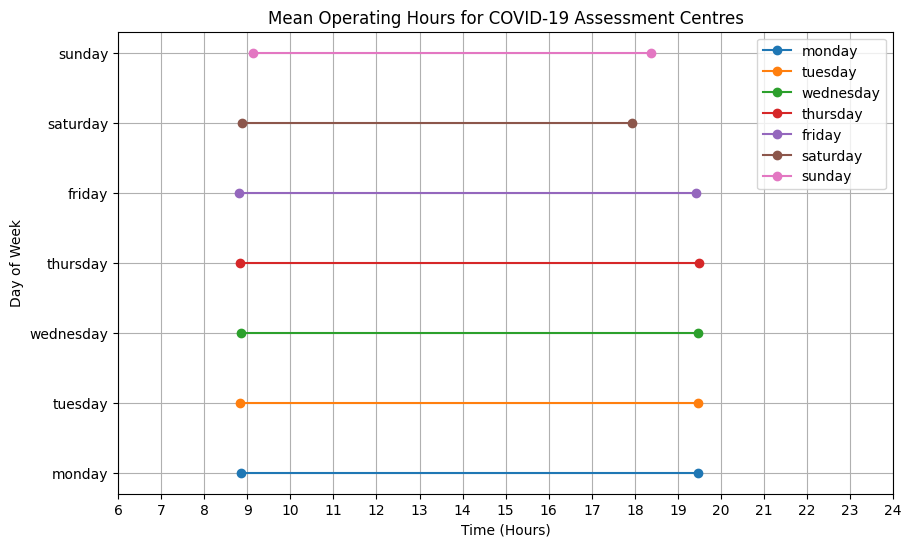

In [168]:
# function to extract operation start and end time
def extract_start_end_times(hours_string):
    """
    Extracts the start and end times from a string representing operating hours.
    Handles cases with multiple time ranges separated by '&'.
    """
    if pd.isna(hours_string):
        return None, None
    
    first_range = hours_string.split('&')[0] # Take only the first range
    times = first_range.split('-')
    
    if len(times) == 2:
        start_time = times[0].strip()
        end_time = times[1].strip()
        return start_time, end_time
    else:
        return None, None 

def time_to_minutes(time_str):
    """Converts a time string (HH:MM) to minutes since midnight."""
    if pd.isna(time_str):
        return None
    try:
        time = datetime.datetime.strptime(time_str, '%H:%M').time()
        return time.hour * 60 + time.minute
    except ValueError:  # Handle invalid time formats
        return None

def calculate_mean_times(day_column):
    """Calculates the mean start and end times for a given day's hours."""
    start_times_minutes = []
    end_times_minutes = []

    for hours in day_column.dropna():
        start, end = extract_start_end_times(hours)
        start_minutes = time_to_minutes(start)
        end_minutes = time_to_minutes(end)
        if start_minutes:
            start_times_minutes.append(start_minutes)
        if end_minutes:
            end_times_minutes.append(end_minutes)
    
    if not start_times_minutes or not end_times_minutes:
        return None, None
    
    mean_start = sum(start_times_minutes) / len(start_times_minutes)
    mean_end = sum(end_times_minutes) / len(end_times_minutes)
    return mean_start, mean_end


# Calculate mean start and end times for each day
days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
mean_times = {}
for day in days:
    mean_start, mean_end = calculate_mean_times(data[day])
    if mean_start:  # Check if mean times are valid
        mean_times[day] = {'start': mean_start, 'end': mean_end}


# Plot the mean start and end times
plt.figure(figsize=(10, 6))
for day, times in mean_times.items():
    plt.plot([times['start'] / 60, times['end'] / 60], [day, day], marker='o', label=day)  # Convert minutes to hours

plt.title('Mean Operating Hours for COVID-19 Assessment Centres')
plt.ylabel('Day of Week')
plt.xlabel('Time (Hours)')
plt.xticks(range(6, 25))
plt.legend()
plt.grid(True)
plt.show()

### b) Appointment Methods:

In [167]:
# Create a new DataFrame to store the counts
appointment_types = pd.DataFrame(columns=['Appointment Type', 'Count'])

# Calculate the counts for each appointment type
appointments_only = data[data['appointments'] == 1.0]['location_id'].count()
walkins_only = data[data['walk_ins'] == 1.0]['location_id'].count()
both = data[(data['appointments'] == 1.0) & (data['walk_ins'] == 1.0)]['location_id'].count()
none = data[(data['appointments'] != 1.0) & (data['walk_ins'] != 1.0)]['location_id'].count()

# Append data to the DataFrame using a list of dictionaries
appointment_types = pd.concat([appointment_types, pd.DataFrame([
    {'Appointment Type': 'Appointments Only', 'Count': appointments_only},
    {'Appointment Type': 'Walk-ins Only', 'Count': walkins_only},
    {'Appointment Type': 'Both', 'Count': both},
    {'Appointment Type': 'None', 'Count': none}
])], ignore_index=True)


# Calculate percentages
total_centers = appointment_types['Count'].sum()
appointment_types['Percentage'] = (appointment_types['Count'] / total_centers) * 100

# Create a pie chart using Plotly
fig = px.pie(appointment_types, values='Percentage', names='Appointment Type', 
             title='Percentage of Assessment Centers Offering Different Appointment Types')
fig.show()

### 3. Geographic Visualization

In [199]:
# Create a dictionary to store the prevalence of each service
service_prevalence = {}

# Calculate the prevalence for each service in the overall dataset
for service in ['french_language_services', 'asl_interpretation', 'children_under_2']:
    service_prevalence[service] = (data[service].sum() / len(data)) * 100

# Create a DataFrame from the service_prevalence dictionary
service_prevalence_df = pd.DataFrame.from_dict(service_prevalence, orient='index', columns=['Percentage'])

# Create a bar chart using Plotly
fig = px.bar(service_prevalence_df, x=service_prevalence_df.index, y='Percentage',
             title='Prevalence of Services in Testing Centres')

fig.update_layout(xaxis_title='Service', yaxis_title='Percentage')
fig.show()

In [252]:
# Assuming 'data' is your DataFrame with latitude and longitude columns

children_data = data[data['children_under_2'] == 1.0]
french_data = data[data['french_language_services'] == 1.0]
asl_data = data[data['asl_interpretation'] == 1.0]

fig = go.Figure(data=go.Scattergeo(
    lon=french_data['longitude'],
    lat=french_data['latitude'],
    mode='markers',
    marker=dict(
        color='red', 
        size=5,
        opacity=0.8
    ),
    name='French Language Services'
))

fig.add_trace(go.Scattergeo(
    lon=children_data['longitude'],
    lat=children_data['latitude'],
    mode='markers',
    marker=dict(
        color='blue',
        size=5,
        opacity=0.8
    ),
    name='Children Under 2 Services'
))

fig.add_trace(go.Scattergeo(
    lon=asl_data['longitude'],
    lat=asl_data['latitude'],
    mode='markers',
    marker=dict(
        color='green',
        size=5,
        opacity=0.8
    ),
    name='ASL Services'
))

fig.update_geos(
    visible=True,
    resolution=50,
    showcountries=False, 
    showsubunits=True, subunitcolor="Blue",
    showocean=True, oceancolor="LightBlue",
    subunitwidth=1,
    showframe=False
)
fig.update_layout(
    margin={"r": 0, "t": 75, "l": 0, "b": 0}, 
    geo=dict(
        projection_scale=18,
        center=dict(lat=43.6532, lon=-79.3832),
        scope='north america'
    ),
    title='Geographic Distribution of Testing Centres with Additional Services',
    showlegend=True
)

fig.show()



## References

Statistics Canada. 2023. (table). Census Profile. 2021 Census of Population. Statistics Canada Catalogue no. 98-316-X2021001. Ottawa. Released November 15, 2023.
https://www12.statcan.gc.ca/census-recensement/2021/dp-pd/prof/index.cfm?Lang=E (accessed September 19, 2024).
